In [42]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

iris=pd.read_csv("E:\IVY PRO SCHOOL\IVY PYTHON\Dataset\Python Datasets\Classification Datasets\IRIS.csv",encoding="latin-1")
print('Shape before deleting duplicate values:',iris.shape)

iris=iris.drop_duplicates()
print("Shape after deleting dulicate values:",iris.shape)

iris.head(10)

Shape before deleting duplicate values: (150, 5)
Shape after deleting dulicate values: (149, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [43]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  149 non-null    float64
 1   Sepal.Width   149 non-null    float64
 2   Petal.Length  149 non-null    float64
 3   Petal.Width   149 non-null    float64
 4   Species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [44]:
iris.nunique()

Sepal.Length    35
Sepal.Width     23
Petal.Length    43
Petal.Width     22
Species          3
dtype: int64

In [45]:
import seaborn as sns


<Axes: xlabel='Species'>

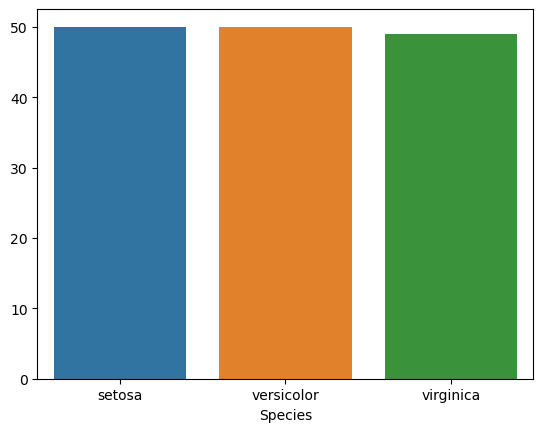

In [46]:
Grp=iris.groupby("Species").size()
sns.barplot(x=Grp.index,y=Grp.values)


# Basic Data Exploration Results

The selected columns in this step are not final, further study will be done and then a final list will be created.
				
* <b>Sepal.Length</b>:Continuous.Selected.
* <b>Sepal.Width</b>:Continuous.Selected.
* <b>Petal.Length</b>:Continuous.Selected.
* <b>Petal.Width</b>:Continuous.Selected.
* <b>Species</b>: Categotical.Selected.This is the <b>Target Variable!</b>


array([[<Axes: title={'center': 'Sepal.Length'}>,
        <Axes: title={'center': 'Sepal.Width'}>],
       [<Axes: title={'center': 'Petal.Length'}>,
        <Axes: title={'center': 'Petal.Width'}>]], dtype=object)

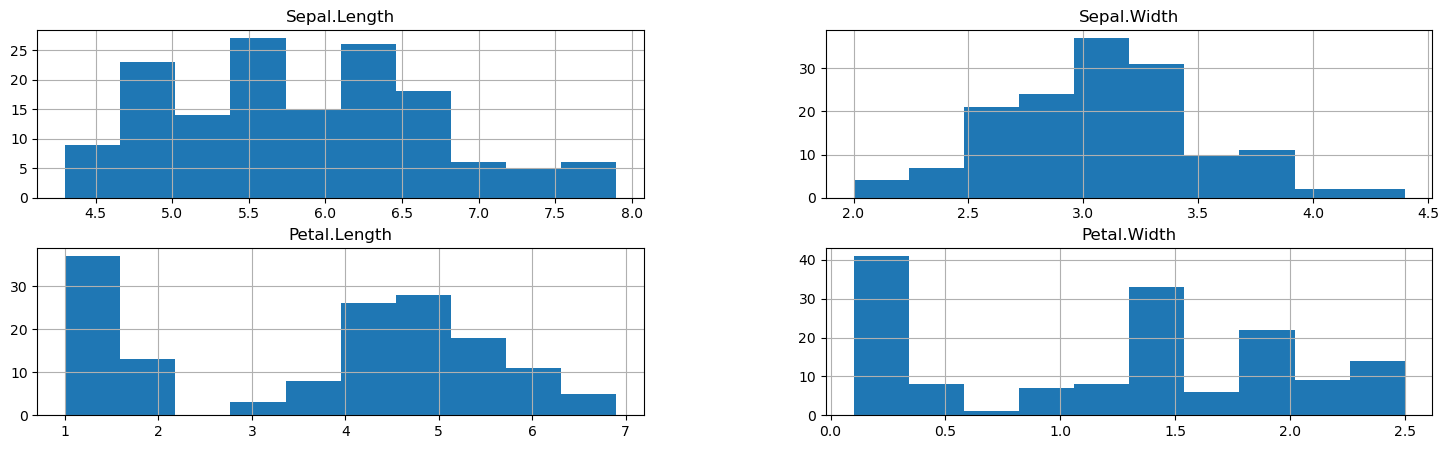

In [47]:
iris.hist(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'],figsize=(18,5))

In [48]:
iris.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

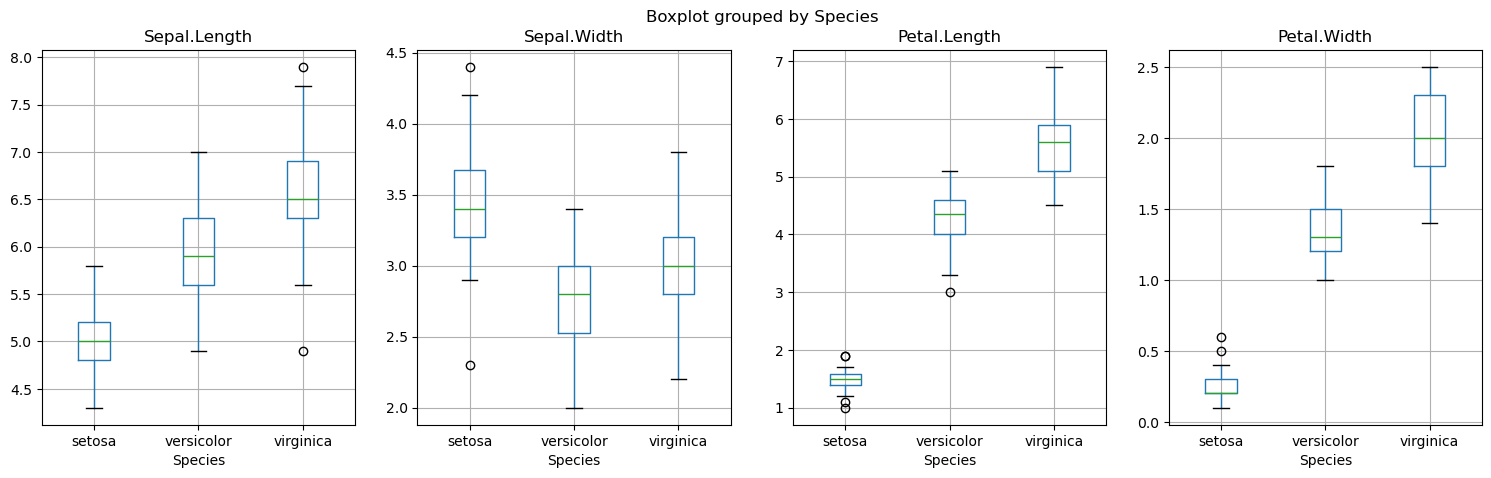

In [49]:
ContinuousColList=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

import matplotlib.pyplot as plt
fig,PlotCanvas=plt.subplots(nrows=1,ncols=len(ContinuousColList),figsize=(18,5))

for PredictorCol, i in zip(ContinuousColList,range(len(ContinuousColList))):
    iris.boxplot(column=PredictorCol,by="Species",figsize=(5,5),vert=True,ax=PlotCanvas[i])

In [50]:
def FunctionAnova(inpData,TargetVariable,ContinuousPredictorList):
    from scipy.stats import f_oneway

    SelectedPredictors=[]

    print("##### ANOVA RESULTS ###### \n")
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults= f_oneway(*CategoryGroupLists)

        if (AnovaResults[1]< 0.05):
            print(predictor,"is correlated with", TargetVariable)
            SelectedPredictors.append(predictor)
        else:
            print(predictor,'is not correlated with',TargetVariable)

    return(SelectedPredictors)

In [51]:
FunctionAnova(inpData=iris,TargetVariable="Species",ContinuousPredictorList=ContinuousColList)

##### ANOVA RESULTS ###### 

Sepal.Length is correlated with Species
Sepal.Width is correlated with Species
Petal.Length is correlated with Species
Petal.Width is correlated with Species


['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

In [52]:
SelectedColumns=list(iris)

DataForML=iris[SelectedColumns]
DataForML.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
DataForML['Species'].replace({'setosa':0, 'versicolor':1, 'virginica':2}, inplace=True)
#DataForML_Numeric=pd.get_dummies(DataForML)
#DataForML_Numeric=DataForML_Numeric.astype(int)
DataForML_Numeric=DataForML
DataForML_Numeric.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [74]:
TargetVariable="Species"
#TargetVariable=["Species_setosa","Species_versicolor","Species_virginica"]
Predictors=ContinuousColList

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=428)

In [76]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[14  0  0]
 [ 0 14  1]
 [ 0  0 16]]
Accuracy of the model on Testing Sample Data: 0.98

Accuracy values for 10-fold Cross Validation:
 [1.         0.93265993 1.         1.         0.93265993 1.
 0.93265993 1.         1.         1.        ]

Final Average Accuracy of the model: 0.98


DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.93      0.90        15
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

[[14  0  0]
 [ 0 14  1]
 [ 0  2 14]]
Accuracy of the model on Testing Sample Data: 0.93

Accuracy values for 10-fold Cross Validation:
 [1.         0.93265993 1.         1.         0.86111111 0.7979798
 0.93265993 0.93265993 1.         1.        ]

Final Average Accuracy of the model: 0.95


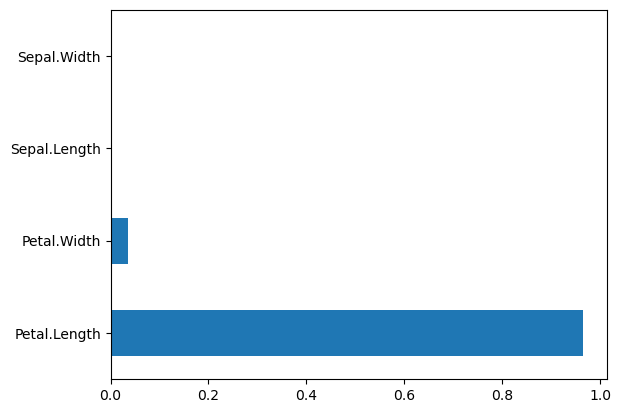

In [56]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

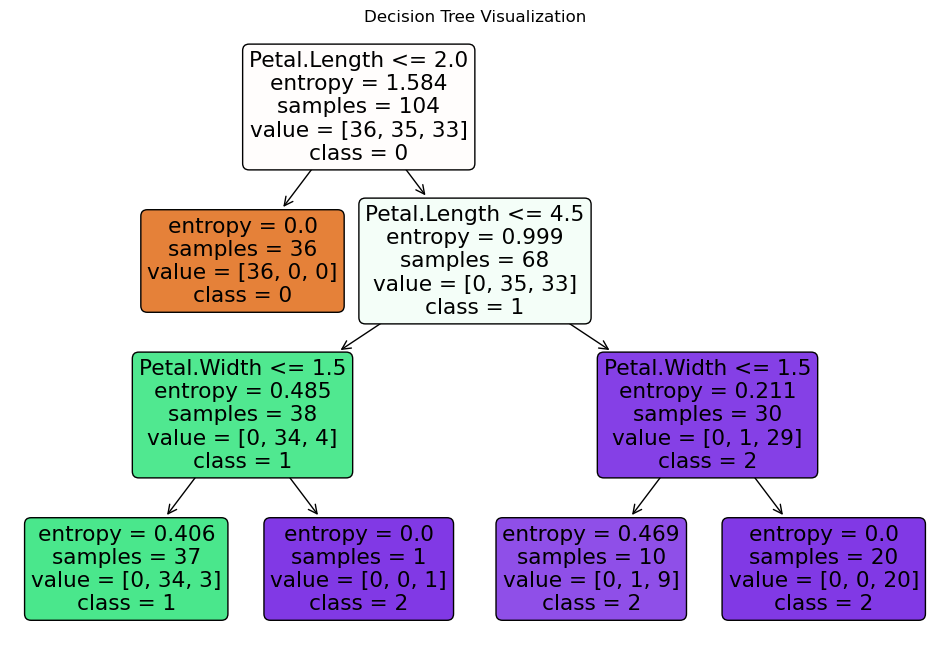

In [70]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(DTree, feature_names=Predictors, class_names=['0', '1',"2"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


RandomForestClassifier(max_depth=7)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[14  0  0]
 [ 0 14  1]
 [ 0  0 16]]
Accuracy of the model on Testing Sample Data: 0.98

Accuracy values for 10-fold Cross Validation:
 [1.         0.93265993 1.         0.93265993 0.93265993 0.93265993
 0.86666667 1.         1.         1.        ]

Final Average Accuracy of the model: 0.96


<Axes: >

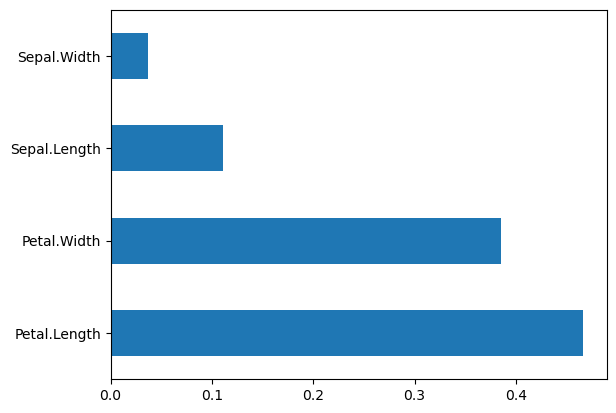

In [71]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=7, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')